In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import numpy as np
import pandas as pd
from data_proc import *

## Value clean-up

How to determine if shooting was conducted by single/multiple perpetrators?

In [51]:
pd.options.display.max_colwidth = 1000
ms2.copy()[ms2['Gender'].isin(['M/F', 'Male/Female'])][['Summary', 'Race', 'Gender']]

,Summary,Race,Gender
77,"Syed Rizwan Farook left a Christmas party held at Inland Regional Center, later returning with Tashfeen Malik and the two opened fire, killing 14 and wounding 21, ten critically. The two were later killed by police as they fled in an SUV.",Other,M/F
78,"On Wednesday of December 2, 2015, two gunmen entered a conference room on the Inland Regional Center property, killing 14 people, and injuring 21 people. The facility was rented by the San Bernardino County Department of Public Health for a holiday party. The shooter was at the party but left abruptly before the shooting. He seemed angry, witnesses told police. He returned and along with his wife, he went into the building and began firing. The man was an inspector with the county health department that hosted the party.",Asian American,Male/Female
133,"Early morning on Feb. 9, 2015 two shooters with significant criminal records entered a house Moon Lake and shot the four residents of the house. Three of the victims were killed and the fourth was injured and escaped the house after the shooters left. The shooters escaped and were arrested a week later.",White American or European American/Some other Race,Male/Female
149,"On the afternoon of June 8, 2014, a man and his wife approached two police officers having lunch in Las Vegas and began shooting, killing them both. The couple then fled to Walmart, where they killed an armed civilian attempting to stop the shooters. The man was killed by police and the woman killed herself at the Walmart.",White American or European American,Male/Female
210,"On December 24, 2007, an unemployed woman and her boyfriend, both aged 29, shot the woman's father in regards to a financial dispute in his home in Carnation, Washington. The couple then shot the woman's mother before her brother, his wife and children arrived, upon which the couple shot and killed all four. They were later arrested in the home.",White American or European American,Male/Female


It would be best to parse summary text and extract that information. We can't simply search for numbers, we need to determine if they refer to perpetrators, victims, police officers or something/someone entirely different.

Ideas:
- split into subsentences and look for key words in them (gunmen, victims, guns)
- count subjects to get number
- gramatical graph, look who performs actions like 'shooting', 'killing', ...

Things to look for:
- ITSes (Intelligent Tutoring Systems) - their goal is to evaluate answers given by students
- Automatic summarization techiques (like RedditBot)
- information extraction
- question answering

Locations - where we don't have location? Do we have lat&long for those records?

In [52]:
ms_races['Location'].isnull().sum()

45

In [53]:
lat_b_mask = ms_races['Latitude'].isnull()
lat_b_mask.sum()

17

In [54]:
loc_lat_b_mask = ms_races['Latitude'].isnull() & ms_races['Location'].isnull()
loc_lat_b_mask.sum()

0

In [55]:
pd.options.display.max_colwidth = 30
no_lat = ms_races[lat_b_mask]
no_lat

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude,gender_dedup,missues_dedup,races_dedup
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally sho...",3,2,5,Yes,Asian,M,NaN,NaN,male,yes,asian
2,3,Pennsylvania supermarket s...,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old...",3,0,3,Unclear,White,M,NaN,NaN,male,NaN,white
3,4,Florida awning manufacture...,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., ...",5,0,5,Unclear,NaN,M,NaN,NaN,male,NaN,NaN
4,5,Rural Ohio nursing home sh...,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot ...",3,0,3,Yes,White,M,NaN,NaN,male,yes,white
5,6,Fresno downtown shooting,"Fresno, California",4/18/2017,"Kori Ali Muhammad, 39, ope...",3,0,3,Unclear,Black,M,NaN,NaN,male,NaN,black
6,7,Fort Lauderdale airport sh...,"Fort Lauderdale, Florida",1/6/2017,"Esteban Santiago, 26, flew...",5,6,11,Yes,Latino,M,NaN,NaN,male,yes,latino
7,8,Cascade Mall shooting,"Burlington, WA",9/23/2016,"Arcan Cetin, 20, killed a ...",5,0,5,Yes,NaN,M,NaN,NaN,male,yes,NaN
8,9,Baton Rouge police shooting,"Baton Rouge, LA",7/17/2016,"Gavin Long, a former Marin...",3,3,6,Yes,Black,M,NaN,NaN,male,yes,black
9,10,Dallas police shooting,"Dallas, Texas",7/7/2016,"Micah Xavier Johnson, a 25...",5,11,16,Unclear,Black,M,NaN,NaN,male,NaN,black
10,11,Orlando nightclub massacre,"Orlando, Florida",6/12/2016,"Omar Mateen, 29, attacked ...",49,53,102,Unclear,Other,M,NaN,NaN,male,NaN,other


Location - which doesn't match pattern XXX, YYY?

In [56]:
loc_match_mask = ms_races['Location'].str.match('^[^,]+?,[^,]+?$').dropna()
loc_match_mask.count()

275

In [57]:
loc_match_mask.value_counts()

True     270
False      5
Name: Location, dtype: int64

In [58]:
loc_match_mask = np.ma.make_mask(loc_match_mask)

In [59]:
pd.options.display.max_colwidth = 60
ms_loc_nonmatch = ms_races['Location'].dropna()[~loc_match_mask]
ms_loc_nonmatch

143    Pennsburg, Souderton, Lansdale, Harleysville, Pennsylvania
160                                               Washington D.C.
172                         South Valley, Albuquerque, New Mexico
221                         Nickel Mines, Lancaster, Pennsylvania
237                                 Santee, San Diego, California
Name: Location, dtype: object

It seems last component is always a state.
In one case we don't have city, but a state only (Washington D.C.)

In [60]:
ms_states = ms_races.copy()
ms_states['state'] = ms_states['Location'].str.split(',').map(lambda l: l[-1].strip(), 'ignore')
ms_states

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude,gender_dedup,missues_dedup,races_dedup,state
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NaN,58,527,585,Unclear,White,M,36.181271,-115.134132,male,NaN,white,NV
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers and wounded ...",3,2,5,Yes,Asian,M,NaN,NaN,male,yes,asian,CA
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis grocery fatall...",3,0,3,Unclear,White,M,NaN,NaN,male,NaN,white,PA
3,4,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employee of manuf...",5,0,5,Unclear,NaN,M,NaN,NaN,male,NaN,NaN,Florida
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot and killed a former girlfriend...",3,0,3,Yes,White,M,NaN,NaN,male,yes,white,Ohio
5,6,Fresno downtown shooting,"Fresno, California",4/18/2017,"Kori Ali Muhammad, 39, opened fire along a street in dow...",3,0,3,Unclear,Black,M,NaN,NaN,male,NaN,black,California
6,7,Fort Lauderdale airport shooting,"Fort Lauderdale, Florida",1/6/2017,"Esteban Santiago, 26, flew from Alaska to Fort Lauderdal...",5,6,11,Yes,Latino,M,NaN,NaN,male,yes,latino,Florida
7,8,Cascade Mall shooting,"Burlington, WA",9/23/2016,"Arcan Cetin, 20, killed a teen girl and three women in t...",5,0,5,Yes,NaN,M,NaN,NaN,male,yes,NaN,WA
8,9,Baton Rouge police shooting,"Baton Rouge, LA",7/17/2016,"Gavin Long, a former Marine who served in Iraq, killed t...",3,3,6,Yes,Black,M,NaN,NaN,male,yes,black,LA
9,10,Dallas police shooting,"Dallas, Texas",7/7/2016,"Micah Xavier Johnson, a 25-year-old Army veteran, target...",5,11,16,Unclear,Black,M,NaN,NaN,male,NaN,black,Texas


In [61]:
ms_states['state'].value_counts()

California         29
Florida            20
Texas              17
Washington         14
Georgia            13
Arizona            11
North Carolina     11
Ohio               10
New York           10
Wisconsin           9
Illinois            9
Alabama             9
Pennsylvania        8
Michigan            6
Virginia            6
Colorado            6
South Carolina      5
Tennessee           5
Kentucky            5
Oklahoma            5
Nevada              5
Massachusetts       4
Kansas              4
Oregon              4
Mississippi         4
Louisiana           4
Minnesota           4
Nebraska            3
New Jersey          3
Connecticut         3
New Mexico          3
Missouri            3
Arkansas            2
CA                  2
Utah                2
Montana             2
Iowa                1
Wyoming             1
WA                  1
Indiana             1
Maine               1
Idaho               1
LA                  1
PA                  1
NV                  1
Vermont   

It seems a couple of states use shortcut (e.g. CA) instead of full name (e.g. California)

In [62]:
ms_states[ms_states['state'].str.len() <= 2]

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude,gender_dedup,missues_dedup,races_dedup,state
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NaN,58,527,585,Unclear,White,M,36.181271,-115.134132,male,NaN,white,NV
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers and wounded ...",3,2,5,Yes,Asian,M,NaN,NaN,male,yes,asian,CA
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis grocery fatall...",3,0,3,Unclear,White,M,NaN,NaN,male,NaN,white,PA
7,8,Cascade Mall shooting,"Burlington, WA",9/23/2016,"Arcan Cetin, 20, killed a teen girl and three women in t...",5,0,5,Yes,NaN,M,NaN,NaN,male,yes,NaN,WA
8,9,Baton Rouge police shooting,"Baton Rouge, LA",7/17/2016,"Gavin Long, a former Marine who served in Iraq, killed t...",3,3,6,Yes,Black,M,NaN,NaN,male,yes,black,LA
155,156,San Francisco Tenderloin,"San Francisco, CA",3/23/2014,"On the evening of March 23, 2014, the shooters were argu...",0,8,8,No,Black American or African American,Male,37.754578,-122.442434,male,no,black,CA


In [63]:
ms_sf['state_full'].value_counts()

california         31
florida            20
texas              17
washington         15
georgia            13
north carolina     11
arizona            11
ohio               10
new york           10
alabama             9
wisconsin           9
illinois            9
pennsylvania        8
virginia            6
nevada              6
colorado            6
michigan            6
oklahoma            5
tennessee           5
south carolina      5
kentucky            5
louisiana           5
oregon              4
kansas              4
massachusetts       4
minnesota           4
mississippi         4
nebraska            3
new jersey          3
missouri            3
connecticut         3
new mexico          3
montana             2
utah                2
arkansas            2
indiana             1
alaska              1
south dakota        1
iowa                1
idaho               1
hawaii              1
maine               1
west virginia       1
wyoming             1
vermont             1
pensylvani

In [64]:
ms_sf['state_full'].value_counts().count()

47

It seems that there are some state that have never seen a mass shooting in last 50 years.

## Histograms (gender, mental issues, races, state)

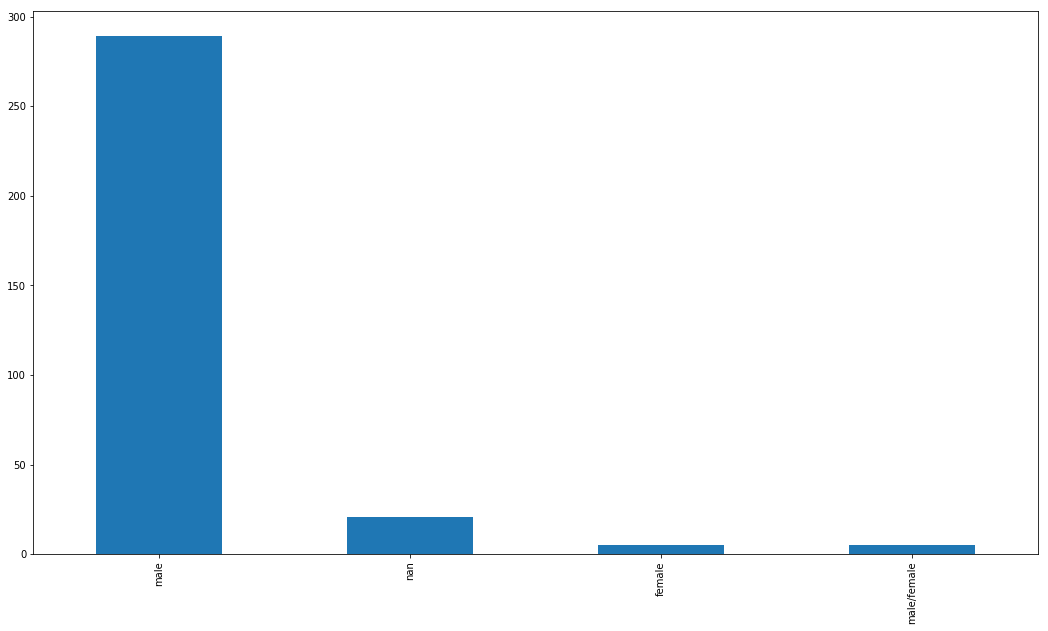

In [65]:
ms_cfilter['gender_dedup'].map(lambda x: str(x)).value_counts().plot.bar(figsize=(18,10))

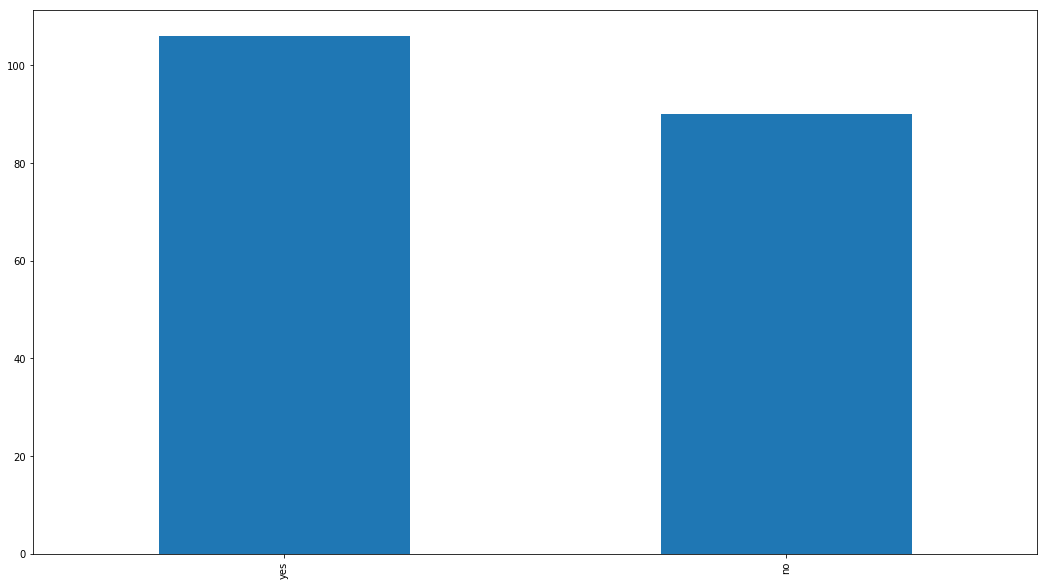

In [66]:
ms_cfilter['missues_dedup'].value_counts().plot.bar(figsize=(18,10))

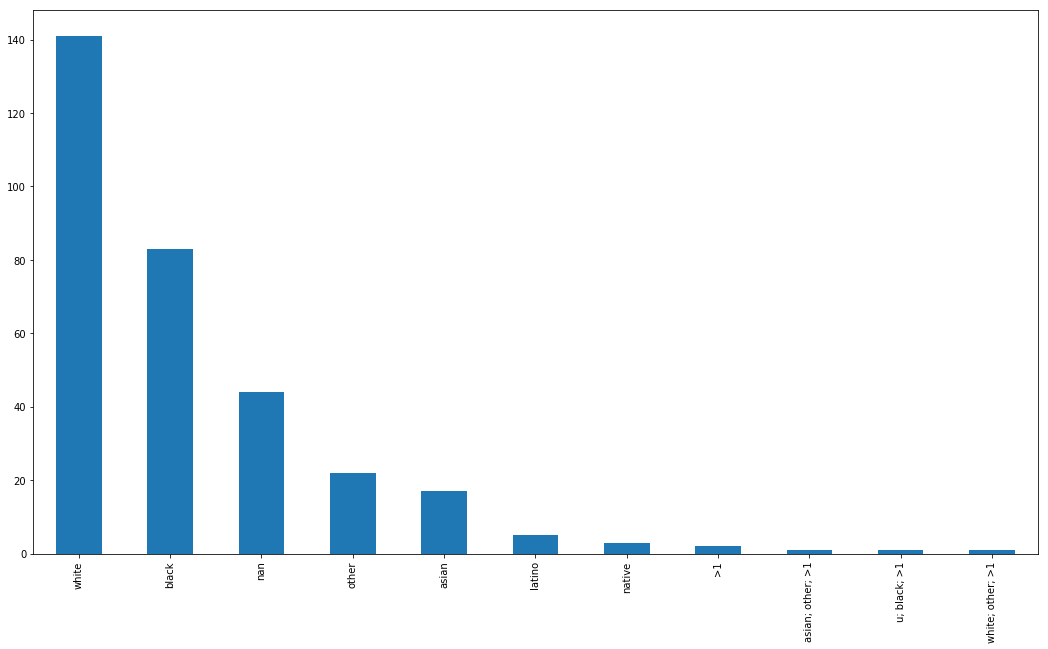

In [67]:
ms_cfilter['races_dedup'].map(lambda x: str(x)).value_counts().plot.bar(figsize=(18,10))

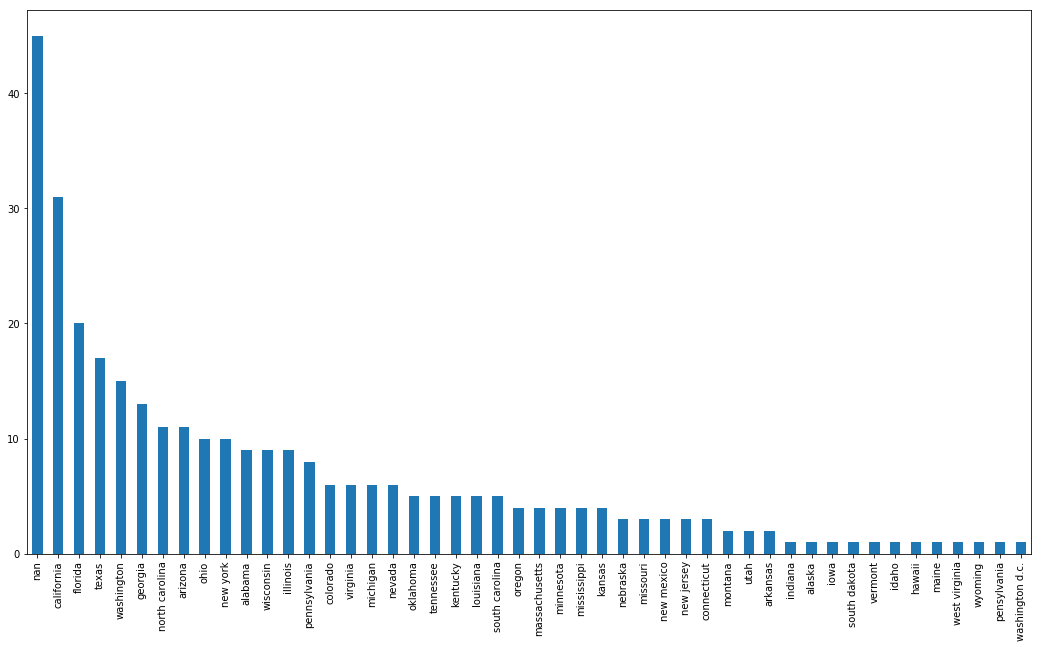

In [68]:
ms_cfilter['state_full'].map(lambda x: str(x)).value_counts().plot.bar(figsize=(18,10))

## Dates

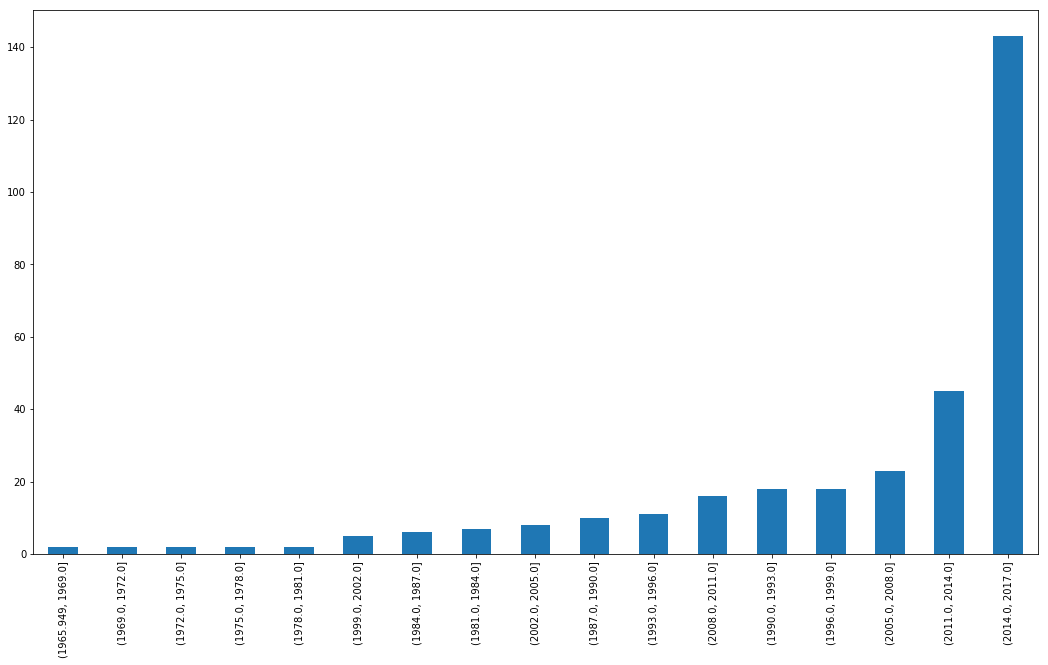

In [69]:
ms_dbin_cnts.iloc[::-1].plot.bar(figsize=(18,10))

Distribution of shootings over the year

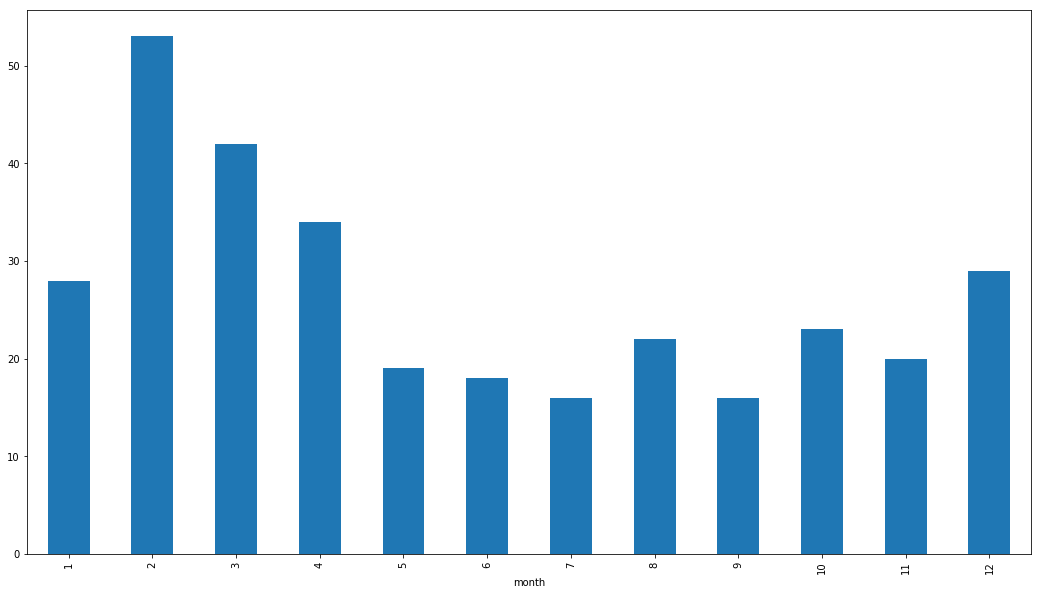

In [70]:
by_month['count'].plot.bar(figsize=(18,10))

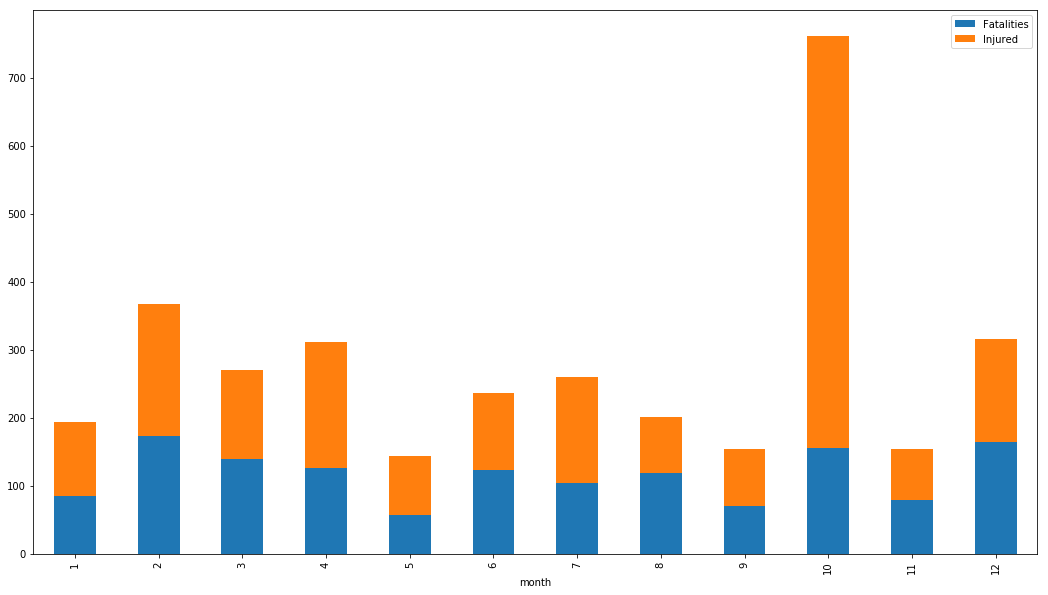

In [71]:
by_month[['Fatalities', 'Injured']].plot.bar(figsize=(18,10),stacked=True)

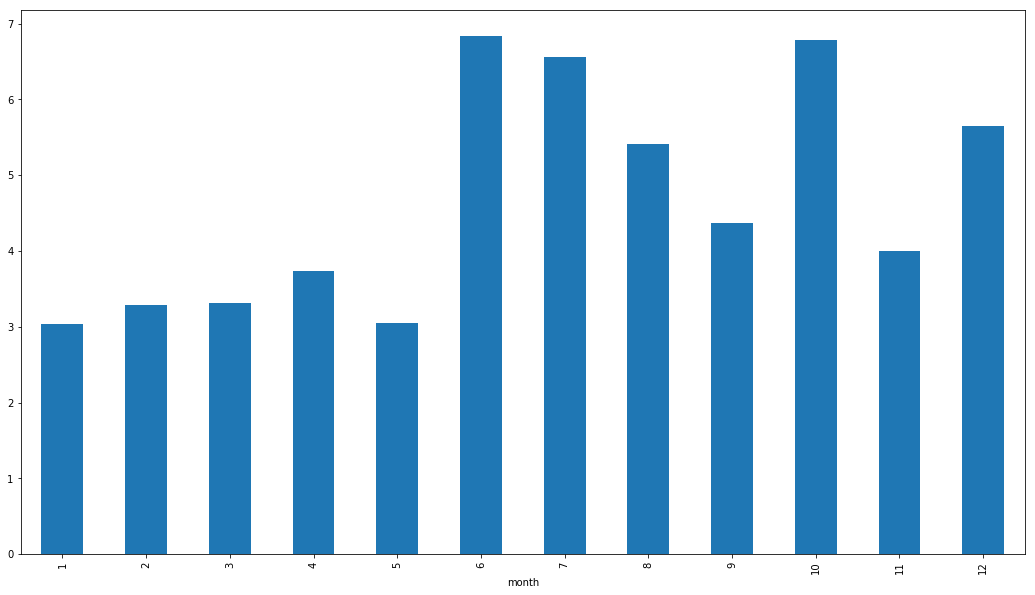

In [72]:
bmsc = by_month.copy()
bmsc['fat_sc'] = bmsc['Fatalities'].map(lambda x: float(x)) / bmsc['count']
bmsc['fat_sc'].plot.bar(figsize=(18,10))

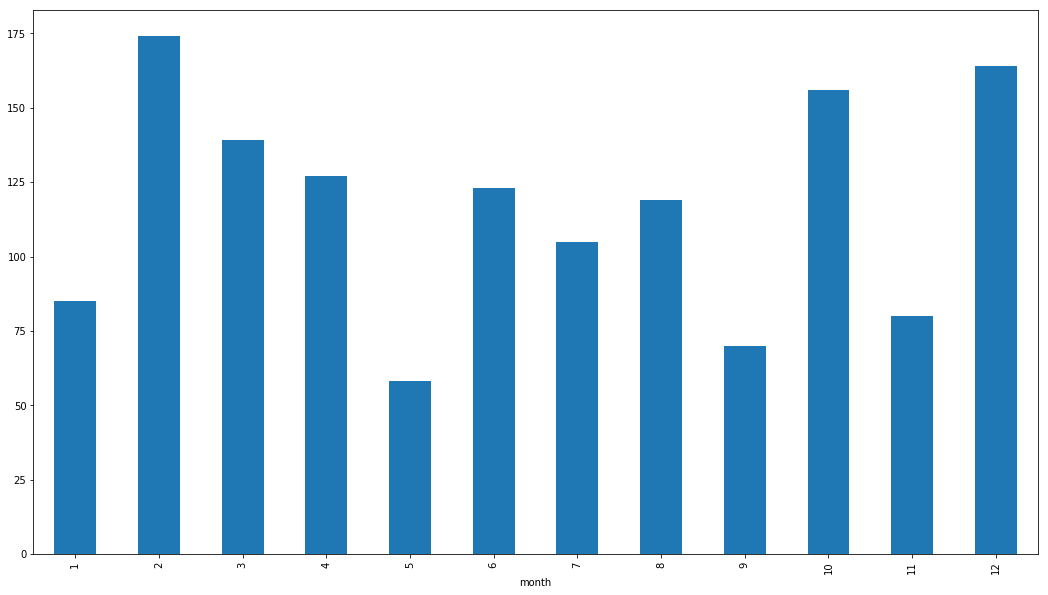

In [73]:
by_month['Fatalities'].plot.bar(figsize=(18,10))

## ToDo
- distribution (count, fatalities)
 - over year
 - over month 
 - over week
- multiple perpetrators suspicion